## IMPORT LIBRARY

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.core.algorithms as algos
from pandas import Series
# import plotly as py
# import plotly.graph_objs as go
# import plotly.express as px
# from plotly.subplots import make_subplots
# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected = True)
import scipy.stats.stats as stats
import re
import traceback
import string
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, auc, \
roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder

## Getting Data

In [5]:
data = pd.read_csv('df.csv')
data.head()

,customer_id,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,promo_code,event_name,traffic_source,churned
0,3,M,Android,Jakarta Raya,36,4,2570.652174,6811.594203,658950.478261,1.246377,242216.420290,1021,Credit Card,WEEKENDSERU,ADD_TO_CART,MOBILE,1
1,8,F,Android,Sulawesi Utara,22,1,962.375000,6875.000000,594825.125000,2.375000,252154.875000,221,Credit Card,WEEKENDSERU,HOMEPAGE,MOBILE,1
2,9,F,Android,Jakarta Raya,16,1,0.000000,5625.000000,514203.750000,1.250000,308843.125000,94,Gopay,NaN,ADD_TO_CART,MOBILE,1
3,11,M,Android,Kalimantan Timur,29,0,9492.000000,15000.000000,197533.000000,1.000000,192025.000000,14,OVO,XX2022,ADD_TO_CART,MOBILE,1
4,15,F,Android,Jawa Barat,39,3,1818.000000,10000.000000,716360.666667,1.000000,233470.222222,109,LinkAja,BUYMORE,ADD_TO_CART,MOBILE,1


In [6]:
data['quantity'] = round(data['quantity'])

## BUSSINESS UNDERSTANDING FROM DATA

In [ ]:
data.head()

,customer_id,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,promo_code,event_name,traffic_source,churned
0,3,M,Android,Jakarta Raya,36,4,2570.652174,6811.594203,658950.478261,1.0,242216.420290,1021,Credit Card,WEEKENDSERU,ADD_TO_CART,MOBILE,1
1,8,F,Android,Sulawesi Utara,22,1,962.375000,6875.000000,594825.125000,2.0,252154.875000,221,Credit Card,WEEKENDSERU,HOMEPAGE,MOBILE,1
2,9,F,Android,Jakarta Raya,16,1,0.000000,5625.000000,514203.750000,1.0,308843.125000,94,Gopay,NaN,ADD_TO_CART,MOBILE,1
3,11,M,Android,Kalimantan Timur,29,0,9492.000000,15000.000000,197533.000000,1.0,192025.000000,14,OVO,XX2022,ADD_TO_CART,MOBILE,1
4,15,F,Android,Jawa Barat,39,3,1818.000000,10000.000000,716360.666667,1.0,233470.222222,109,LinkAja,BUYMORE,ADD_TO_CART,MOBILE,1


In [ ]:
data.shape

(50241, 17)

In [ ]:
data.describe()

,customer_id,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,churned
count,50241.000000,50241.000000,50241.000000,50241.000000,50241.000000,5.024100e+04,50241.000000,50241.000000,50241.000000,50241.000000
mean,49815.963894,26.517764,2.600207,1914.821569,9197.428839,8.290669e+05,1.441353,249948.851382,413.027189,0.801477
std,28946.641557,7.267224,1.740121,1900.153189,5766.689870,8.560286e+05,0.906402,60004.950821,809.724972,0.398892
min,3.000000,6.000000,0.000000,0.000000,0.000000,2.745000e+04,1.000000,24546.000000,4.000000,0.000000
25%,24706.000000,21.000000,1.000000,310.444444,6724.137931,3.271772e+05,1.000000,223649.750000,27.000000,1.000000
50%,49742.000000,26.000000,2.000000,1604.095238,9090.909091,5.666690e+05,1.000000,247890.000000,110.000000,1.000000
75%,74845.000000,31.000000,4.000000,2775.120000,10000.000000,1.011609e+06,2.000000,271024.000000,413.000000,1.000000
max,99999.000000,68.000000,6.000000,21395.000000,50000.000000,1.390450e+07,34.000000,816079.000000,16540.000000,1.000000


## DATA PREPROCESSING

In [ ]:
data.isna().sum()

customer_id                     0
gender                          0
device_type                     0
home_location                   0
age                             0
age_from_first_join_date        0
promo_amount                    0
shipment_fee                    0
total_amount                    0
quantity                        0
item_price                      0
event_count                     0
payment_method                  0
promo_code                  11853
event_name                      0
traffic_source                  0
churned                         0
dtype: int64

terdapat nilai NAN pada feature promo_code sebanyak 11853 yang harus kita proses, kita dapat melakukan drop atau fillna tergantung kebutuhan.

In [7]:
data.fillna("tidak Pakai Promo", inplace=True)

In [ ]:
data.isna().sum()

customer_id                 0
gender                      0
device_type                 0
home_location               0
age                         0
age_from_first_join_date    0
promo_amount                0
shipment_fee                0
total_amount                0
quantity                    0
item_price                  0
event_count                 0
payment_method              0
promo_code                  0
event_name                  0
traffic_source              0
churned                     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [8]:
data['traffic_source'].unique()

array(['MOBILE', 'WEB', "['MOBILE' 'WEB']"], dtype=object)

In [9]:
data['traffic_source'] = data['traffic_source'].replace("['MOBILE' 'WEB']", "Nan")
data['traffic_source'] = data['traffic_source'].replace("Nan", "")
data['traffic_source'] = data['traffic_source'].replace("", )


In [10]:
data['traffic_source'].unique()

array(['MOBILE', 'WEB'], dtype=object)

## EXPLORATORY DATA ANALYSIS

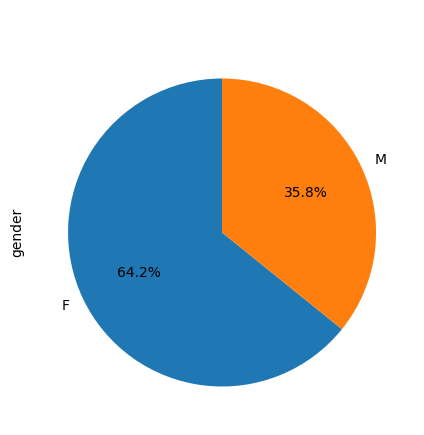

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
data['gender'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
ax.set_title('Gender Pie Chart', fontsize=20, fontweight='bold', color='white')
plt.show()

pada pie chart sesuai feature 'gender', disimpulkan bahwa gender yang mendominasi transaksi pada perusahaan fashion campus yaitu 'Female'

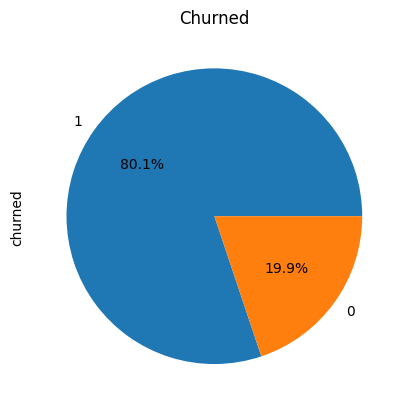

In [ ]:
data['churned'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churned')
plt.show()

In [ ]:
data.corr()

C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_16188\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,customer_id,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,churned
customer_id,1.000000,-0.003474,-0.005665,0.000130,0.000847,-0.003214,-0.002657,0.009060,0.000048,-0.004760
age,-0.003474,1.000000,-0.001491,-0.008164,-0.003734,-0.012325,-0.005590,-0.003453,-0.009528,0.002562
age_from_first_join_date,-0.005665,-0.001491,1.000000,0.218283,-0.004470,0.050097,-0.009376,-0.001001,0.203082,0.267702
promo_amount,0.000130,-0.008164,0.218283,1.000000,-0.007219,0.002822,-0.012592,-0.008127,0.043077,0.074927
shipment_fee,0.000847,-0.003734,-0.004470,-0.007219,1.000000,-0.002392,-0.001622,-0.004801,-0.000676,-0.000612
total_amount,-0.003214,-0.012325,0.050097,0.002822,-0.002392,1.000000,0.305267,0.130684,0.266502,-0.103113
quantity,-0.002657,-0.005590,-0.009376,-0.012592,-0.001622,0.305267,1.000000,-0.003590,-0.021394,0.016298
item_price,0.009060,-0.003453,-0.001001,-0.008127,-0.004801,0.130684,-0.003590,1.000000,0.000116,-0.000029
event_count,0.000048,-0.009528,0.203082,0.043077,-0.000676,0.266502,-0.021394,0.000116,1.000000,-0.455492
churned,-0.004760,0.002562,0.267702,0.074927,-0.000612,-0.103113,0.016298,-0.000029,-0.455492,1.000000


C:\Users\nuvolaofficial\AppData\Local\Temp\ipykernel_16188\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

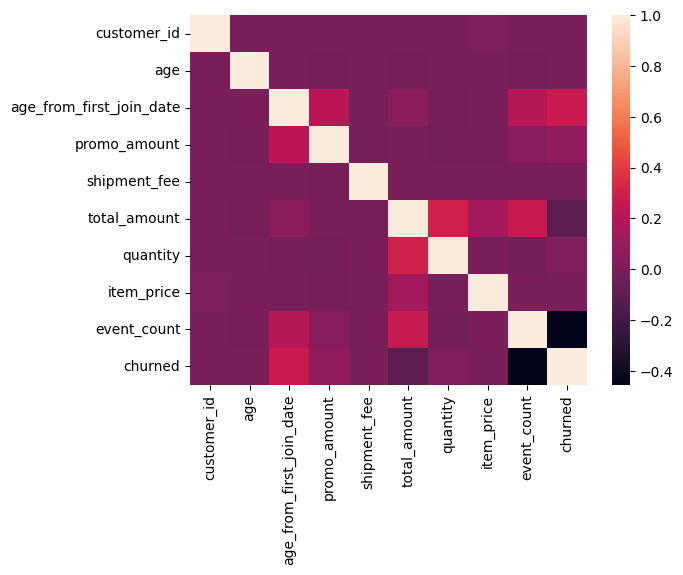

In [ ]:
sns.heatmap(data.corr())

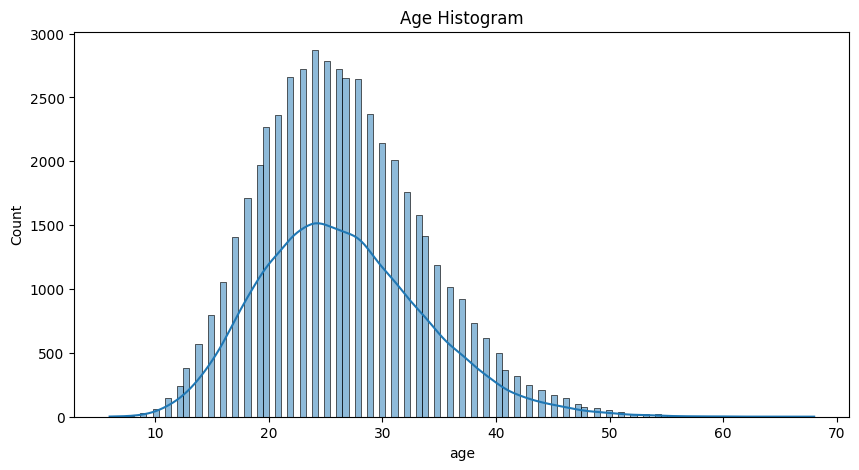

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=data, x='age', kde=True)
ax.set_title('Age Histogram')
plt.show()

In [ ]:
data['age'].value_counts().head(5)

24    2871
25    2788
26    2725
23    2720
22    2659
Name: age, dtype: int64

didapatkan bahwa 'age' yang mendominasi pada transaksi berkisar pada rentang usia 20 - 24 tahun

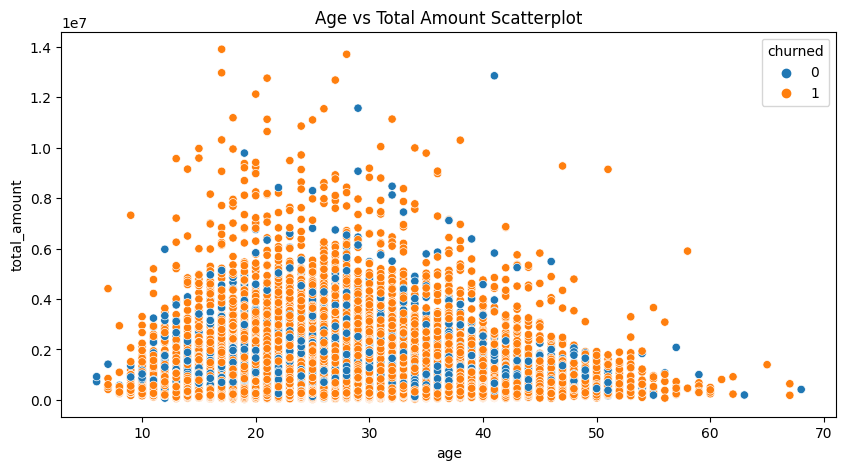

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=data, x='age', y='total_amount', hue='churned')
ax.set_title('Age vs Total Amount Scatterplot')
plt.show()


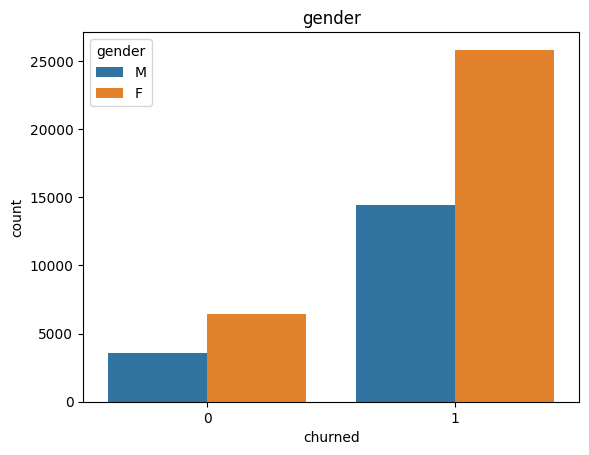

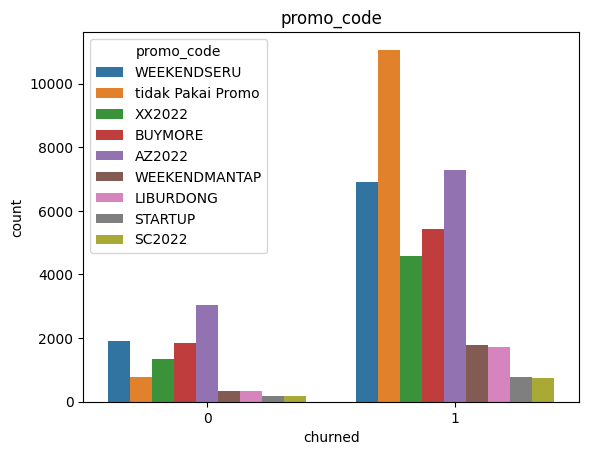

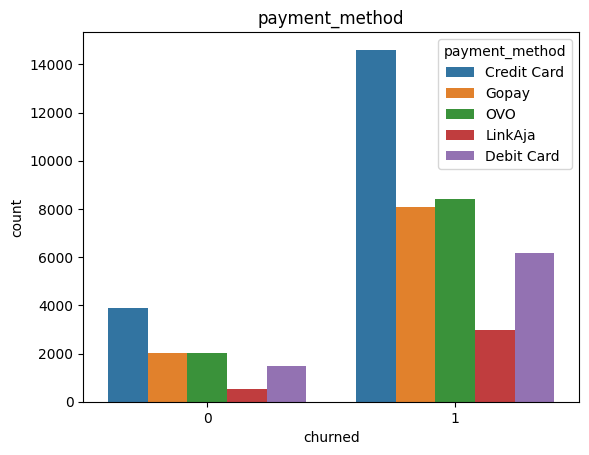

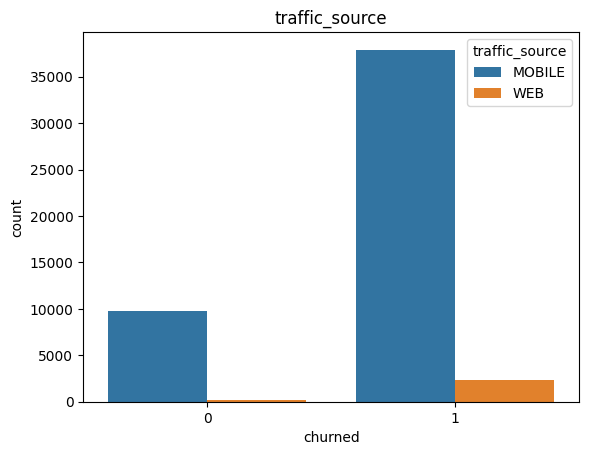

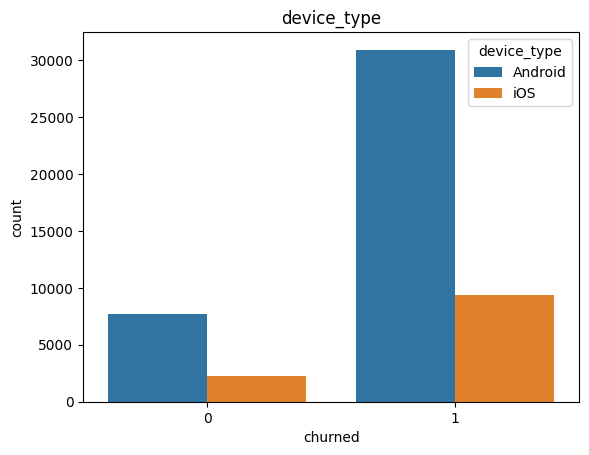

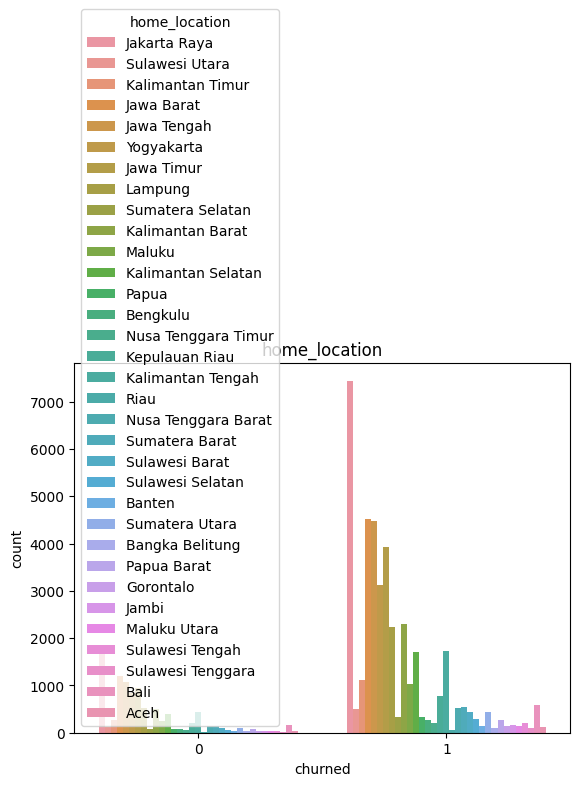

In [ ]:
num_col = ['gender','promo_code','payment_method','traffic_source','device_type','home_location']
for i in num_col:
    sns.countplot(data = data, x = "churned", hue= i)
    plt.title(i)
    plt.show()

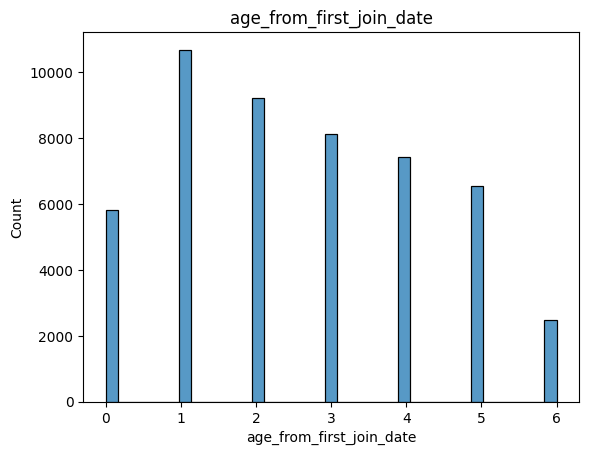

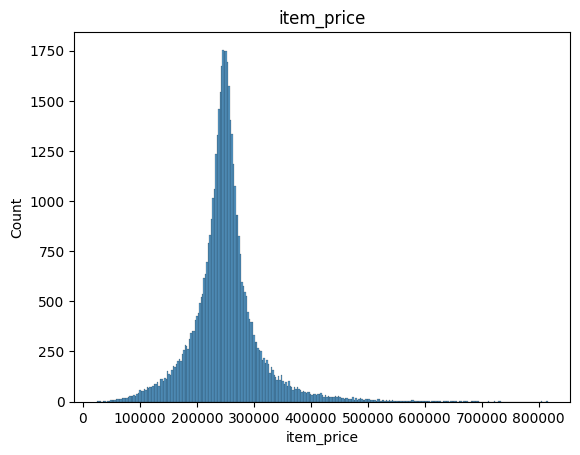

In [ ]:
num_cols = ['age_from_first_join_date', 'item_price']
for col in num_cols:
    sns.histplot(data[col])
    plt.title(col)
    plt.show()


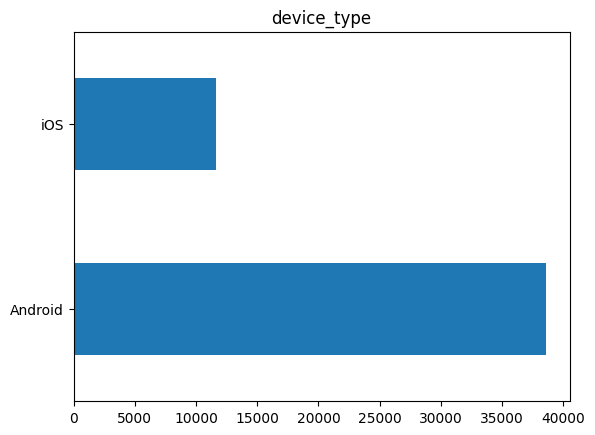

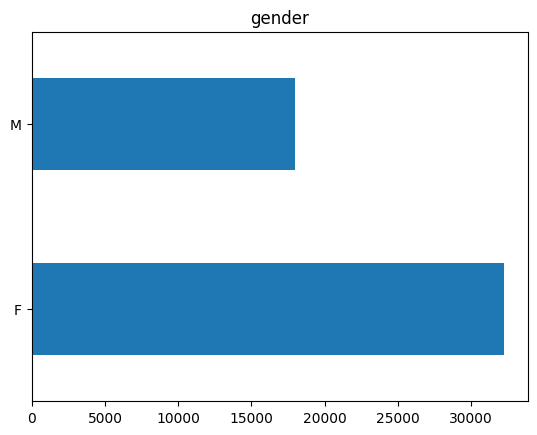

In [ ]:
cat_cols = ['device_type', 'gender']
for col in cat_cols:
    data[col].value_counts().plot(kind='barh')
    plt.title(col)
    plt.show()

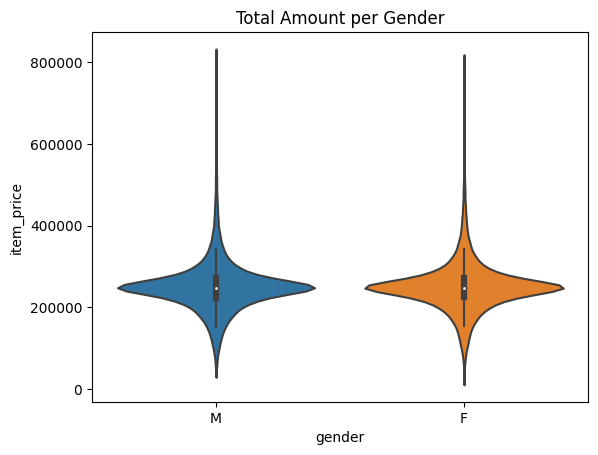

In [ ]:
sns.violinplot(x='gender', y='item_price', data=data)
plt.title('Total Amount per Gender')
plt.show()


In [ ]:
top_10_city = data['home_location'].value_counts().head(10)
data.isna().sum()

customer_id                 0
gender                      0
device_type                 0
home_location               0
age                         0
age_from_first_join_date    0
promo_amount                0
shipment_fee                0
total_amount                0
quantity                    0
item_price                  0
event_count                 0
payment_method              0
promo_code                  0
event_name                  0
traffic_source              0
churned                     0
dtype: int64

Text(0.5, 1.0, '10 Besar Asal Kota Customer')

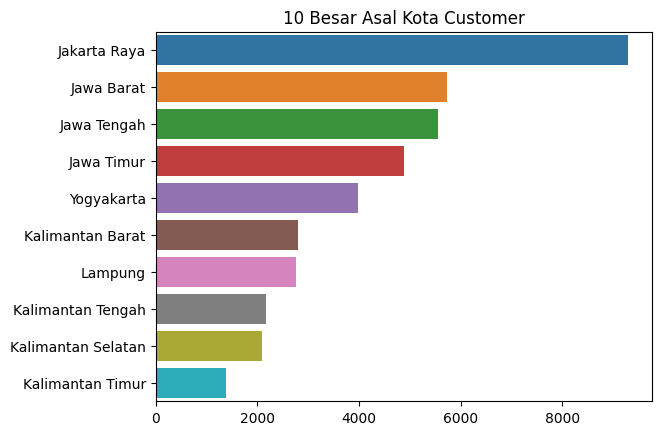

In [ ]:
sns.barplot(x=top_10_city.values, y=top_10_city.index)
plt.title("10 Besar Asal Kota Customer")

Text(0.5, 1.0, 'Metode Pembayaran')

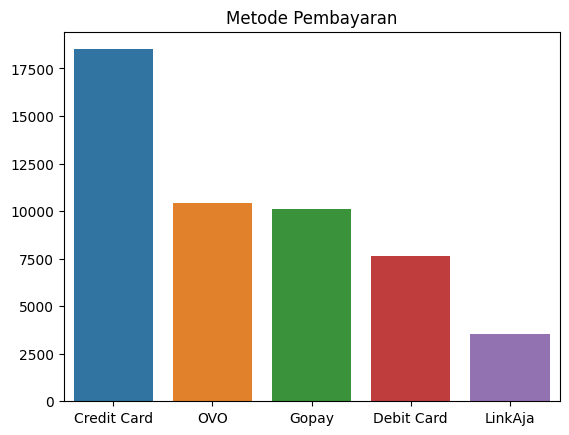

In [ ]:
mp = data['payment_method'].value_counts().head()
sns.barplot(x = mp.index, y = mp.values)
plt.title('Metode Pembayaran')

Text(0.5, 1.0, 'usia dari tanggal pertama gabung')

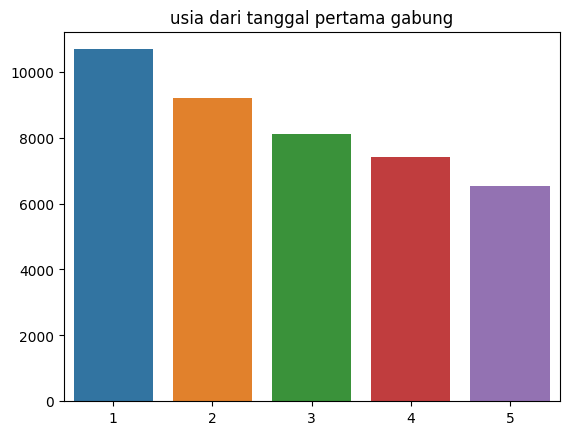

In [ ]:
ages = data['age_from_first_join_date'].value_counts().head()
sns.barplot(x = ages.index, y = ages.values)
plt.title('usia dari tanggal pertama gabung')


## DATA MINING AND MODELLING

In [11]:
X = data.drop(['customer_id', 'churned'], axis=1)
y = data['churned']

In [12]:
y.value_counts(normalize= True)

1    0.801477
0    0.198523
Name: churned, dtype: float64

berdasarkan hasil normalisasi pada target variabel, didapatkan bahwa ada ketidakseimbangan yang terjadi pada data target y yaitu churn 80% dan not churn 20%. kita harus membuat data diatas tersebut menjadi seimbang dengan teknik oversampling menggunakan SMOTENC(SMOTE NOMINAL DAN CONTINOUS)

In [13]:
# SMOTENC oversampling
sm = SMOTENC(random_state=0, sampling_strategy={0:40000}, 
             categorical_features=[0, 1, 2, 11, 12, 13, 14])
X_res, y_res = sm.fit_resample(X, y)

In [14]:
y_res.value_counts(normalize=True)

1    0.501663
0    0.498337
Name: churned, dtype: float64

# preprocess data with other methods

In [15]:
data = data.drop(['customer_id','event_name'], axis=1)

In [ ]:
data.columns

Index(['gender', 'device_type', 'home_location', 'age',
       'age_from_first_join_date', 'promo_amount', 'shipment_fee',
       'total_amount', 'quantity', 'item_price', 'event_count',
       'payment_method', 'promo_code', 'traffic_source', 'churned'],
      dtype='object')

Feature Selection

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [17]:
data['gender'] = le.fit_transform(data['gender'])
data['device_type'] = le.fit_transform(data['device_type'])
data['home_location'] = le.fit_transform(data['home_location'])
data['payment_method'] = le.fit_transform(data['payment_method'])
data['traffic_source'] = le.fit_transform(data['traffic_source'])
data['promo_code'] = le.fit_transform(data['promo_code'])

## DEEP LEARNING

In [18]:
import pandas as pd
from IPython.display import display

# Create training and validation splits
df_train = data.sample(frac=0.7, random_state=0)
df_valid = data.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('churned', axis=1)
X_valid = df_valid.drop('churned', axis=1)
y_train = df_train['churned']
y_valid = df_valid['churned']

,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,promo_code,traffic_source,churned
32502,0,0,32,21,4,6436.000000,3333.333333,943047.0,2.0,379676.333333,37,4,0,0,1
30782,0,0,12,25,5,0.000000,10000.000000,426231.0,1.0,208115.500000,30,0,8,0,1
45697,0,0,15,33,6,0.000000,0.000000,71555.0,1.0,71555.000000,9,2,8,0,1
22253,1,0,17,35,1,741.666667,9583.333333,2748923.5,2.0,295751.416667,253,4,6,0,1


In [26]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[14]),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.07813624292612076


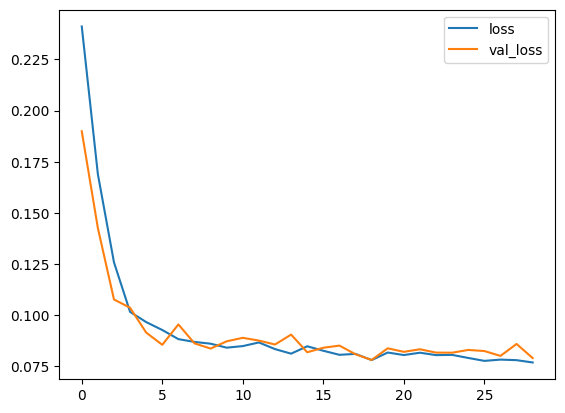

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=50,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## NORMALISASI

In [ ]:
data_norm = (data - data.min()) / (data.max() - data.min())

In [ ]:
data

,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,promo_code,traffic_source,churned
0,1,0,6,36,4,2570.652174,6811.594203,6.589505e+05,1.0,242216.420290,1021,0,6,0,1
1,0,0,28,22,1,962.375000,6875.000000,5.948251e+05,2.0,252154.875000,221,0,6,0,1
2,0,0,6,16,1,0.000000,5625.000000,5.142038e+05,1.0,308843.125000,94,2,8,0,1
3,1,0,14,29,0,9492.000000,15000.000000,1.975330e+05,1.0,192025.000000,14,4,7,0,1
4,0,0,8,39,3,1818.000000,10000.000000,7.163607e+05,1.0,233470.222222,109,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50236,0,0,16,38,2,731.882353,10588.235294,8.254932e+05,1.0,215035.588235,172,4,0,0,1
50237,0,0,32,17,2,1148.653846,10320.512821,6.968140e+05,1.0,250702.423077,1356,0,1,0,0
50238,1,1,19,18,2,0.000000,10000.000000,2.264610e+05,1.0,216461.000000,10,2,8,0,1
50239,0,0,16,8,4,2484.791667,8958.333333,2.940142e+06,1.0,228675.833333,772,0,1,0,1


## SPLIT TRAIN TEST DATA

In [ ]:
X = data_norm.drop(['churned','gender','device_type','age'], axis=1)
y = data_norm['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2023, shuffle= True, stratify= None)

# ALGORITMA RANDOM FOREST CLASSIFIER

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,
                             criterion='entropy',
                             verbose = 20,
                             warm_start= False,
                            #  max_features= 0.7,
                            #  max_leaf_nodes= 75,
                            #  class_weight='balanced', 
                             random_state=2023,
                             max_samples= 0.2)
rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s remaining:    0.0s


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.8s remaining:    0.0s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


RandomForestClassifier(criterion='entropy', max_samples=0.2, random_state=2023,
                       verbose=20)

In [ ]:
y_pred = rfc.predict(X_test) # Predicting the Test set results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('accuracy train :', accuracy_score(y_true=y_train, y_pred= rfc.predict(X_train)))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC : ', roc_auc_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s


Confusion Matrix:
 [[ 851  166]
 [ 174 3834]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      1017
         1.0       0.96      0.96      0.96      4008

    accuracy                           0.93      5025
   macro avg       0.89      0.90      0.90      5025
weighted avg       0.93      0.93      0.93      5025



[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s remaining:    0.0s


accuracy train : 0.9536889596602972
Accuracy: 0.9323383084577115
AUC :  0.8966808271362879
Precision :  0.9585
Mean Absolute Error: 0.06766169154228856


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


<Axes: >

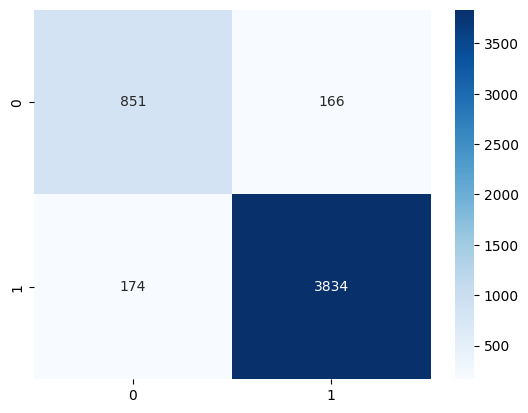

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_score = rfc.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_score)

In [ ]:
roc_auc = auc(fpr, tpr)

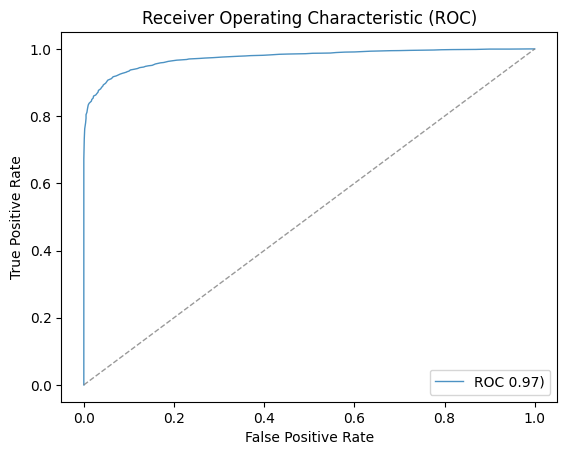

In [ ]:
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# ALGORITMA LINEAR SUPPORT VECTOR MACHINE CLASSIFIER(SVC)

In [ ]:
svm = LinearSVC(penalty = 'l2',
                loss = 'squared_hinge',
                dual = True, 
                multi_class = 'crammer_singer',
                class_weight ='balanced',
                intercept_scaling = 1.5,
                random_state=2023)

In [ ]:
svm.fit(X_train, y_train)

c:\Users\nuvolaofficial\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', intercept_scaling=1.5,
          multi_class='crammer_singer', random_state=2023)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('accuracy train :', accuracy_score(y_true=y_train, y_pred=svm.predict(X_train)))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Confusion Matrix:
 [[ 960   57]
 [ 483 3525]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.94      0.78      1017
         1.0       0.98      0.88      0.93      4008

    accuracy                           0.89      5025
   macro avg       0.82      0.91      0.85      5025
weighted avg       0.92      0.89      0.90      5025

accuracy train : 0.8822540693559802
Accuracy: 0.8925373134328358
Precision :  0.9840871021775545
Mean Absolute Error: 0.10746268656716418


<Axes: >

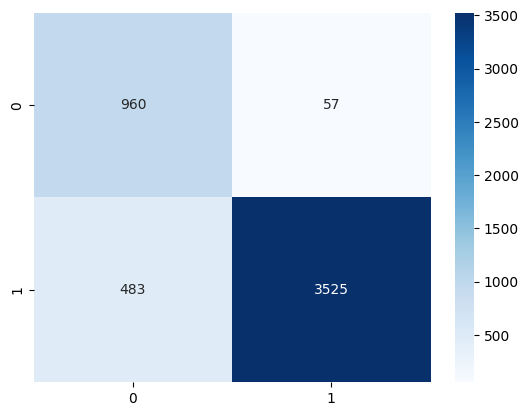

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [ ]:
from sklearn.metrics import RocCurveDisplay

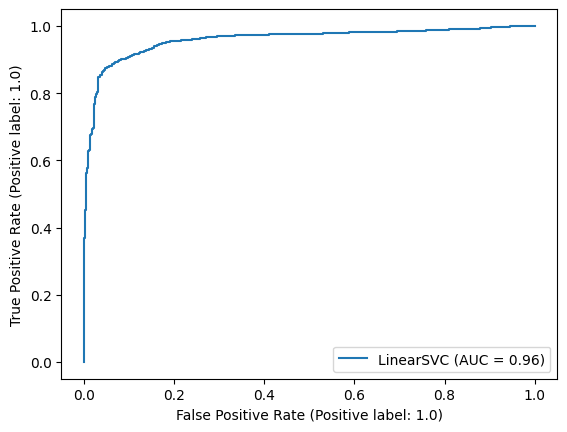

In [ ]:
svm_disp = RocCurveDisplay.from_estimator(svm, X_test, y_test)
plt.show()